### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv", delimiter=',')
data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [3]:
lines = open("Data_Dictionary.txt", "r")
for i in lines:
    print(i)

Field Name				Definition

RefID				        Unique (sequential) number assigned to vehicles

IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 

PurchDate				The Date the vehicle was Purchased at Auction

Auction					Auction provider at which the  vehicle was purchased

VehYear					The manufacturer's year of the vehicle

VehicleAge				The Years elapsed since the manufacturer's year

Make					Vehicle Manufacturer 

Model					Vehicle Model

Trim					Vehicle Trim Level

SubModel				Vehicle Submodel

Color					Vehicle Color

Transmission				Vehicles transmission type (Automatic, Manual)

WheelTypeID				The type id of the vehicle wheel

WheelType				The vehicle wheel type description (Alloy, Covers)

VehOdo					The vehicles odometer reading

Nationality				The Manufacturer's country

Size					The size category of the vehicle (Compact, SUV, etc.)

TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers

MMRAcquisitionAuctionAve

## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

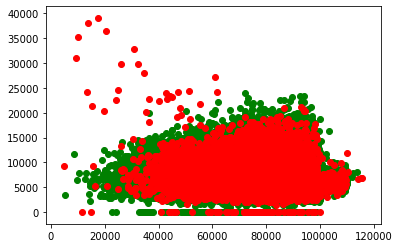

In [5]:
bad = data['IsBadBuy'] != 0
bad = data.loc[bad, ('VehOdo', 'MMRCurrentRetailAveragePrice')]

notbad = data['IsBadBuy'] == 0
notbad = data.loc[notbad, ('VehOdo', 'MMRCurrentRetailAveragePrice')]
plt.scatter(notbad['VehOdo'], notbad['MMRCurrentRetailAveragePrice'], c = 'g')
plt.scatter(bad['VehOdo'], bad['MMRCurrentRetailAveragePrice'], c = 'r')

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [6]:
from sklearn import *
import numpy as np

depend_columns = ['VehOdo', 'MMRCurrentRetailAveragePrice', 'VehicleAge', 'VehBCost']
predict_columns = ['IsBadBuy']
columns = depend_columns + predict_columns

vehodo = data.loc[pd.notnull(data['VehOdo']), columns]
avr = vehodo.loc[pd.notnull(data['MMRCurrentRetailAveragePrice']), columns]
model = linear_model.LinearRegression()
trainX = np.asarray(avr.loc[:50000, depend_columns])
trainY = np.asarray(avr.loc[:50000, predict_columns])
model.fit(trainX, trainY)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('R² Value: \n', model.score(trainX, trainY))

Coefficient: 
 [[ 8.26578666e-07  3.22334772e-06  2.85611135e-02 -1.29983123e-05]]
Intercept: 
 [-0.00161391]
R² Value: 
 0.031631823226980105


## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [7]:
testX = np.asarray(avr.loc[50000:, depend_columns])
testY = np.asarray(avr.loc[50000:, predict_columns])
predictY = model.predict(testX)
print(predictY)

[[0.09637463]
 [0.11438831]
 [0.17662767]
 ...
 [0.11733203]
 [0.09139148]
 [0.07387575]]


## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [8]:
predictionClass = [1 if predictY[i] > 0.5 else 0 for i in range(predictY.shape[0])]
print(predictionClass[:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [9]:
print(metrics.classification_report(testY, predictionClass))
print(metrics.confusion_matrix(testY, predictionClass))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     19896
           1       0.00      0.00      0.00      2986

    accuracy                           0.87     22882
   macro avg       0.43      0.50      0.47     22882
weighted avg       0.76      0.87      0.81     22882

[[19896     0]
 [ 2986     0]]


/home/wowah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [10]:
tree_model = tree.DecisionTreeClassifier(max_depth=20)
tree_model.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [11]:
predictY = tree_model.predict_proba(testX)
print(predictY)

[[0.87272727 0.12727273]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [0.85714286 0.14285714]
 [0.90909091 0.09090909]
 [0.98876404 0.01123596]]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [12]:
predY = [predictY[i][0] < predictY[i][1] for i in range(predictY.shape[0])]
print(metrics.classification_report(testY, predY))
print(metrics.confusion_matrix(testY, predY))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19896
           1       0.19      0.10      0.14      2986

    accuracy                           0.82     22882
   macro avg       0.53      0.52      0.52     22882
weighted avg       0.78      0.82      0.80     22882

[[18558  1338]
 [ 2673   313]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [13]:
trainX = np.asarray(avr.loc[:50000, depend_columns])
trainY = np.asarray(avr.loc[:50000, predict_columns])
testX = np.asarray(avr.loc[50000:, depend_columns])
testY = np.asarray(avr.loc[50000:, predict_columns])

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [14]:
from sklearn.model_selection import cross_val_score

depths = [i * 5 for i in range(1,10)]

for depth in depths:
    print("Depth: ", depth)
    tree_model = tree.DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(tree_model, trainX, trainY, cv=10)
    print("Train data accuracy: ", score.mean())
    
    score = cross_val_score(tree_model, trainX, trainY, cv=10)
    print("Test data accuracy: ", score.mean())

Depth:  5
Train data accuracy:  0.8805109735735414
Test data accuracy:  0.8805109735735414
Depth:  10
Train data accuracy:  0.875108011916265
Test data accuracy:  0.8749071683717634
Depth:  15
Train data accuracy:  0.8581958718957337
Test data accuracy:  0.8581958678546251
Depth:  20
Train data accuracy:  0.8345751176928766
Test data accuracy:  0.8348362748260753
Depth:  25
Train data accuracy:  0.8137664797849353
Test data accuracy:  0.8119186102426417
Depth:  30
Train data accuracy:  0.8015141197823269
Test data accuracy:  0.8017350436627062
Depth:  35
Train data accuracy:  0.7960308771958658
Test data accuracy:  0.7951066902218575
Depth:  40
Train data accuracy:  0.7936203430881286
Test data accuracy:  0.7947652158381376
Depth:  45
Train data accuracy:  0.7933393033593641
Test data accuracy:  0.7937407563932034


# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [15]:
import numpy as np

trainX = np.asarray(avr.loc[:50000, depend_columns])
trainY = np.asarray(avr.loc[:50000, predict_columns])

tree_model = tree.DecisionTreeClassifier(max_depth=depth)

predictY = model.predict(trainX)
predictionClass = [1 if predictY[i] > 0.5 else 0 for i in range(predictY.shape[0])]

loss = np.array(list(map(lambda x,y: 0 if x==y else 1000 if x==0 else 100, trainY, predictionClass)))
print("Loss function: ", loss.mean())

Loss function:  11.966979331954125


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [16]:
import numpy as np

trainX = np.asarray(avr.loc[:50000, depend_columns])
trainY = np.asarray(avr.loc[:50000, predict_columns])

tree_model = tree.DecisionTreeClassifier(max_depth=depth)

predictY = model.predict(trainX)

bounds = [i * 0.1 for i in range(1,10)]
for bound in bounds:
    print("Bound: ", bound)
    predictionClass = [1 if predictY[i] > bound else 0 for i in range(predictY.shape[0])]

    loss = np.array(list(map(lambda x,y: 0 if x==y else 1000 if x==0 else 100, trainY, predictionClass)))
    print("Loss function: ", loss.mean())
    

Bound:  0.1
Loss function:  515.8836644103883
Bound:  0.2
Loss function:  81.92500050213911
Bound:  0.30000000000000004
Loss function:  12.647879968666519
Bound:  0.4
Loss function:  11.966979331954125
Bound:  0.5
Loss function:  11.966979331954125
Bound:  0.6000000000000001
Loss function:  11.966979331954125
Bound:  0.7000000000000001
Loss function:  11.966979331954125
Bound:  0.8
Loss function:  11.966979331954125
Bound:  0.9
Loss function:  11.966979331954125
